In [ ]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import lazypredict

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train1.csv')

# Separate features and target
X = data.drop(columns=['fraudRisk'])
y = data['fraudRisk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:16<00:00,  2.05it/s]

[LightGBM] [Info] Number of positive: 308, number of negative: 4691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 4999, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061612 -> initscore=-2.723301
[LightGBM] [Info] Start training from score -2.723301


100%|██████████| 29/29 [00:16<00:00,  1.72it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.90               0.85     0.85      0.92   
Perceptron                         0.93               0.80     0.80      0.93   
QuadraticDiscriminantAnalysis      0.93               0.76     0.76      0.94   
LinearDiscriminantAnalysis         0.95               0.76     0.76      0.95   
GaussianNB                         0.93               0.74     0.74      0.93   
XGBClassifier                      0.95               0.74     0.74      0.95   
AdaBoostClassifier                 0.95               0.74     0.74      0.95   
LogisticRegression                 0.96               0.73     0.73      0.95   
LGBMClassifier                     0.95               0.73     0.73      0.95   
BaggingClassifier                  0.95               0.73     0.73      0.95   
CalibratedClassifierCV      

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Read the CSV file
data = pd.read_csv('/content/Sample_Train2.csv')

# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using one-hot encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X_imputed[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and append the encoded columns
X_imputed.drop(columns=categorical_cols, inplace=True)
X_final = pd.concat([X_imputed, X_encoded], axis=1)

# Check for missing values
print("Missing values in features:", X_final.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier with verbose output
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Missing values in features: 0
Missing values in target: 0


  3%|▎         | 1/29 [00:33<15:47, 33.84s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.916, 'Balanced Accuracy': 0.5198222829801777, 'ROC AUC': 0.5198222829801776, 'F1 Score': 0.889929450369155, 'Time taken': 33.83634662628174}


  7%|▋         | 2/29 [00:58<12:54, 28.69s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.92, 'Balanced Accuracy': 0.49783549783549785, 'ROC AUC': 0.49783549783549785, 'F1 Score': 0.8855, 'Time taken': 25.08410406112671}


 10%|█         | 3/29 [01:02<07:27, 17.22s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 3.550755500793457}


 14%|█▍        | 4/29 [01:13<06:05, 14.60s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 10.59622573852539}


 17%|█▋        | 5/29 [01:14<03:57,  9.89s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [01:21<03:23,  8.84s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.909, 'Balanced Accuracy': 0.516034404192299, 'ROC AUC': 0.5160344041922988, 'F1 Score': 0.8859099570135867, 'Time taken': 6.789740324020386}


 24%|██▍       | 7/29 [01:23<02:25,  6.64s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 2.1044509410858154}


 28%|██▊       | 8/29 [01:25<01:50,  5.24s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.913, 'Balanced Accuracy': 0.5121610845295056, 'ROC AUC': 0.5121610845295056, 'F1 Score': 0.8867490569548522, 'Time taken': 2.256279230117798}


 31%|███       | 9/29 [01:32<01:52,  5.61s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 6.413360357284546}


 34%|███▍      | 10/29 [01:35<01:34,  4.95s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.901, 'Balanced Accuracy': 0.4875541125541126, 'ROC AUC': 0.4875541125541126, 'F1 Score': 0.8758800631246711, 'Time taken': 3.48248553276062}


 38%|███▊      | 11/29 [01:40<01:27,  4.84s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 4.590816020965576}


 41%|████▏     | 12/29 [01:47<01:33,  5.51s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 7.039663791656494}


 45%|████▍     | 13/29 [01:52<01:28,  5.54s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 5.608847379684448}


 48%|████▊     | 14/29 [02:14<02:35, 10.35s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 21.441983461380005}


 52%|█████▏    | 15/29 [02:20<02:07,  9.08s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.84, 'Balanced Accuracy': 0.49077238550922764, 'ROC AUC': 0.49077238550922764, 'F1 Score': 0.8484270520584195, 'Time taken': 6.139003038406372}


 55%|█████▌    | 16/29 [02:27<01:49,  8.41s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 6.860698223114014}


 59%|█████▊    | 17/29 [02:30<01:22,  6.88s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 3.30159854888916}


 62%|██████▏   | 18/29 [02:32<00:59,  5.40s/it]

NuSVC model failed to execute
specified nu is infeasible


 66%|██████▌   | 19/29 [02:39<00:57,  5.79s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.839, 'Balanced Accuracy': 0.5083447254499885, 'ROC AUC': 0.5083447254499887, 'F1 Score': 0.8499488831417449, 'Time taken': 6.6792216300964355}


 69%|██████▉   | 20/29 [02:42<00:44,  4.97s/it]

{'Model': 'Perceptron', 'Accuracy': 0.853, 'Balanced Accuracy': 0.5038448393711552, 'ROC AUC': 0.5038448393711552, 'F1 Score': 0.8567489892900206, 'Time taken': 3.054734706878662}


 72%|███████▏  | 21/29 [03:04<01:21, 10.25s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 22.553112983703613}


 76%|███████▌  | 22/29 [03:09<00:59,  8.44s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 4.208191156387329}


 79%|███████▉  | 23/29 [03:14<00:44,  7.41s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 5.0232813358306885}


 83%|████████▎ | 24/29 [03:18<00:32,  6.56s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 4.578004837036133}


 86%|████████▌ | 25/29 [03:21<00:21,  5.44s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 2.809201717376709}


 90%|████████▉ | 26/29 [04:41<01:23, 27.82s/it]

{'Model': 'SVC', 'Accuracy': 0.924, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8875010395010396, 'Time taken': 80.0323793888092}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [04:58<00:18, 18.86s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.917, 'Balanced Accuracy': 0.5143255866940077, 'ROC AUC': 0.5143255866940077, 'F1 Score': 0.8889917273737499, 'Time taken': 16.799078702926636}
[LightGBM] [Info] Number of positive: 69, number of negative: 930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069069 -> initscore=-2.601078
[LightGBM] [Info] Start training from score -2.601078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [05:03<00:00, 10.46s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.923, 'Balanced Accuracy': 0.50549669628617, 'ROC AUC': 0.5054966962861699, 'F1 Score': 0.8888870907162014, 'Time taken': 5.034627914428711}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.92               0.52     0.52      0.89   
DecisionTreeClassifier             0.91               0.52     0.52      0.89   
XGBClassifier                      0.92               0.51     0.51      0.89   
ExtraTreeClassifier                0.91               0.51     0.51      0.89   
PassiveAggressiveClassifier        0.84               0.51     0.51      0.85   
LGBMClassifier                     0.92               0.51     0.51      0.89   
Perceptron                         0.85               0.50     0.50      0.86   
DummyClassifier                    0.92               0.50     0.50      0.89   
ExtraTre

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train3.csv')

# Separate features and target
X = data.drop(columns=['fraud'])
y = data['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


 97%|█████████▋| 28/29 [00:18<00:00,  2.79it/s]

[LightGBM] [Info] Number of positive: 857, number of negative: 9143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085700 -> initscore=-2.367306
[LightGBM] [Info] Start training from score -2.367306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:19<00:00,  1.51it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
AdaBoostClassifier                 1.00               0.99     0.99      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
LGBMClassifier                     1.00               0.99     0.99      1.00   
XGBClassifier                      1.00               0.99     0.99      1.00   
ExtraTreesClassifier               1.00               0.98     0.98      1.00   
KNeighborsClassifier               0.99               0.97     0.97      0.99   
LabelPropagation                   0.99               0.97     0.97      0.99   
LabelSpreading                     0.99               0.97     0.97      0.99   
SVC                         

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV file
data = pd.read_csv('/content/Sample_Train3.csv')

# Separate features and target
X = data.drop(columns=['fraud'])
y = data['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)

# Print the predictions
print(predictions)

100%|██████████| 29/29 [00:33<00:00,  2.07it/s]

[LightGBM] [Info] Number of positive: 1372, number of negative: 14628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085750 -> initscore=-2.366668
[LightGBM] [Info] Start training from score -2.366668


100%|██████████| 29/29 [00:33<00:00,  1.17s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             1.00               0.99     0.99      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
BaggingClassifier                  1.00               0.99     0.99      1.00   
AdaBoostClassifier                 1.00               0.99     0.99      1.00   
LGBMClassifier                     1.00               0.99     0.99      1.00   
XGBClassifier                      1.00               0.98     0.98      1.00   
ExtraTreesClassifier               0.99               0.97     0.97      0.99   
KNeighborsClassifier               0.99               0.97     0.97      0.99   
LabelPropagation                   0.99               0.96     0.96      0.99   
LabelSpreading                     0.99               0.96     0.96      0.99   
SVC                         

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train4.csv')

# Separate features and target
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


 97%|█████████▋| 28/29 [00:15<00:00,  2.02it/s]

[LightGBM] [Info] Number of positive: 1150, number of negative: 3849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3501
[LightGBM] [Info] Number of data points in the train set: 4999, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230046 -> initscore=-1.208051
[LightGBM] [Info] Start training from score -1.208051


100%|██████████| 29/29 [00:15<00:00,  1.84it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.67               0.66     0.66      0.70   
LGBMClassifier                     0.80               0.64     0.64      0.78   
XGBClassifier                      0.79               0.64     0.64      0.78   
BernoulliNB                        0.79               0.63     0.63      0.77   
RandomForestClassifier             0.81               0.63     0.63      0.78   
ExtraTreesClassifier               0.80               0.63     0.63      0.78   
AdaBoostClassifier                 0.80               0.62     0.62      0.77   
BaggingClassifier                  0.79               0.62     0.62      0.77   
SVC                                0.81               0.62     0.62      0.78   
KNeighborsClassifier               0.78               0.62     0.62      0.76   
NearestCentroid             

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train5.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train6.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Check for class imbalance
print("Class distribution in target variable:")
print(y.value_counts())

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# If there is class imbalance, balance the classes by downsampling the majority class
min_class = y.value_counts().idxmin()
maj_class = y.value_counts().idxmax()
if y.value_counts()[min_class] / y.value_counts()[maj_class] < 0.5:
    X_imputed['Class'] = y
    minority = X_imputed[X_imputed['Class'] == min_class]
    majority = X_imputed[X_imputed['Class'] == maj_class]

    # Downsample majority class
    majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

    # Combine minority class with downsampled majority class
    balanced_data = pd.concat([minority, majority_downsampled])

    # Separate features and target after downsampling
    X_imputed = balanced_data.drop(columns=['Class'])
    y = balanced_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Class distribution in target variable:
Class
0    9961
1      38
Name: count, dtype: int64


100%|██████████| 29/29 [00:00<00:00, 30.29it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 20, number of negative: 18
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526316 -> initscore=0.105361
[LightGBM] [Info] Start training from score 0.105361
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train7.csv')

# Separate features and target
X = data.drop(columns=['NFLAG_INSURED_ON_APPROVAL'])
y = data['NFLAG_INSURED_ON_APPROVAL']

# Check for class imbalance
print("Class distribution in target variable:")
print(y.value_counts())

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# If there is class imbalance, balance the classes by downsampling the majority class
min_class = y.value_counts().idxmin()
maj_class = y.value_counts().idxmax()
if y.value_counts()[min_class] / y.value_counts()[maj_class] < 0.5:
    X_imputed['NFLAG_INSURED_ON_APPROVAL'] = y
    minority = X_imputed[X_imputed['NFLAG_INSURED_ON_APPROVAL'] == min_class]
    majority = X_imputed[X_imputed['NFLAG_INSURED_ON_APPROVAL'] == maj_class]

    # Downsample majority class
    majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

    # Combine minority class with downsampled majority class
    balanced_data = pd.concat([minority, majority_downsampled])

    # Separate features and target after downsampling
    X_imputed = balanced_data.drop(columns=['NFLAG_INSURED_ON_APPROVAL'])
    y = balanced_data['NFLAG_INSURED_ON_APPROVAL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


Class distribution in target variable:
NFLAG_INSURED_ON_APPROVAL
0.00    4155
1.00    1988
Name: count, dtype: int64


 97%|█████████▋| 28/29 [00:06<00:00,  2.67it/s]

[LightGBM] [Info] Number of positive: 994, number of negative: 994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3639
[LightGBM] [Info] Number of data points in the train set: 1988, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:06<00:00,  4.31it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.90     0.90      0.90   
XGBClassifier                      0.90               0.90     0.90      0.90   
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
RandomForestClassifier             0.88               0.88     0.88      0.88   
BaggingClassifier                  0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
SVC                                0.87               0.87     0.87      0.87   
NuSVC                              0.86               0.86     0.86      0.85   
DecisionTreeClassifier             0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LinearSVC                   

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/content/Sample_Train8.csv')

# Separate features and target
X = data.drop(columns=['targets'])
y = data['targets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)

 97%|█████████▋| 28/29 [00:27<00:00,  1.40it/s]

[LightGBM] [Info] Number of positive: 980, number of negative: 4020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4258
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196000 -> initscore=-1.411485
[LightGBM] [Info] Start training from score -1.411485


100%|██████████| 29/29 [00:28<00:00,  1.03it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.93               0.87     0.87      0.93   
XGBClassifier                      0.93               0.86     0.86      0.92   
ExtraTreesClassifier               0.93               0.85     0.85      0.92   
DecisionTreeClassifier             0.90               0.84     0.84      0.90   
AdaBoostClassifier                 0.92               0.84     0.84      0.91   
BaggingClassifier                  0.91               0.84     0.84      0.91   
RandomForestClassifier             0.92               0.84     0.84      0.92   
BernoulliNB                        0.86               0.83     0.83      0.86   
KNeighborsClassifier               0.90               0.81     0.81      0.89   
ExtraTreeClassifier                0.88               0.81     0.81      0.88   
Perceptron                  

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Read the CSV file
data = pd.read_csv('/content/Sample_Train9.csv')

# Separate features and target
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Handle missing values by imputing with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle categorical variables using label encoding
categorical_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_imputed[col] = encoder.fit_transform(X_imputed[col])

# Combine the features and target to downsample
data_balanced = pd.concat([X_imputed, y], axis=1)

# Separate majority and minority classes
majority = data_balanced[data_balanced.isFraud == 0]
minority = data_balanced[data_balanced.isFraud == 1]

# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([minority, majority_downsampled])

# Separate features and target after downsampling
X_balanced = data_balanced.drop(columns=['isFraud'])
y_balanced = data_balanced['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.5, random_state=123)

# Initialize and fit the LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models
print(models)


 10%|█         | 3/29 [00:00<00:02, 10.72it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8529411764705882, 'Balanced Accuracy': 0.8529411764705882, 'ROC AUC': 0.8529411764705882, 'F1 Score': 0.8528138528138528, 'Time taken': 0.20713067054748535}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764707, 'F1 Score': 0.8822510822510822, 'Time taken': 0.06859278678894043}
{'Model': 'BernoulliNB', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.03038954734802246}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.07140803337097168}


 31%|███       | 9/29 [00:00<00:01, 17.15it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8382352941176471, 'Balanced Accuracy': 0.838235294117647, 'ROC AUC': 0.8382352941176471, 'F1 Score': 0.837919826652221, 'Time taken': 0.02981281280517578}
{'Model': 'DummyClassifier', 'Accuracy': 0.5, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3333333333333333, 'Time taken': 0.02549576759338379}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8529411764705882, 'Balanced Accuracy': 0.8529411764705882, 'ROC AUC': 0.8529411764705882, 'F1 Score': 0.8517872711421098, 'Time taken': 0.018883943557739258}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9117647058823529, 'Balanced Accuracy': 0.9117647058823529, 'ROC AUC': 0.9117647058823529, 'F1 Score': 0.9117647058823528, 'Time taken': 0.11689543724060059}
{'Model': 'GaussianNB', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.018473386764526367}


 72%|███████▏  | 21/29 [00:00<00:00, 35.13it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8210526315789475, 'Time taken': 0.024775266647338867}
{'Model': 'LabelPropagation', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.02030205726623535}
{'Model': 'LabelSpreading', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.016988754272460938}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8819444444444443, 'Time taken': 0.017250776290893555}
{'Model': 'LinearSVC', 'Accuracy': 0.9117647058823529, 'Balanced Accuracy': 0.9117647058823529, 'ROC AUC': 0.9117647058823529, 'F1 Score': 0.9117647058823528, 'Time taken': 0.016088

 86%|████████▌ | 25/29 [00:01<00:00, 27.77it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235294, 'F1 Score': 0.8676184295911744, 'Time taken': 0.15946745872497559}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8819444444444443, 'Time taken': 0.01796436309814453}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8676470588235294, 'Balanced Accuracy': 0.8676470588235294, 'ROC AUC': 0.8676470588235293, 'F1 Score': 0.86738894907909, 'Time taken': 0.017933130264282227}
{'Model': 'SGDClassifier', 'Accuracy': 0.8235294117647058, 'Balanced Accuracy': 0.8235294117647058, 'ROC AUC': 0.8235294117647058, 'F1 Score': 0.8233766233766234, 'Time taken': 0.017334938049316406}
{'Model': 'SVC', 'Accuracy': 0.8823529411764706, 'Balanced Accuracy': 0.8823529411764706, 'ROC AUC': 0.8823529411764706, 'F1 Score': 0.8822510822510822, 'Time taken': 0.02010655403137207}
{'Mod

100%|██████████| 29/29 [00:01<00:00, 24.01it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8529411764705882, 'Balanced Accuracy': 0.8529411764705882, 'ROC AUC': 0.8529411764705883, 'F1 Score': 0.8529411764705882, 'Time taken': 0.09545755386352539}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.91               0.91     0.91      0.91   
ExtraTreesClassifier               0.91               0.91     0.91      0.91   
Perceptron                         0.88               0.88     0.88      0.88   
LogisticRegression                 0.88               0.88     0.88      0.88   
BaggingClassifier                  0.88               0.88     0.88      0.88   
LinearDiscriminantAnalysis         0.88               0.88     0.88      0.88   
LabelSpreading                     0.88               0.88     0.88      0.88   
LabelPropagation                   0.88               0.88     0.88     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train1.csv")
print(credit.head())

   custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0       1       1     35           1     3000         4            14   
1       2       2      2           1        0         9             0   
2       3       2      2           1        0        27             9   
3       4       1     15           1        0        12             0   
4       5       1     46           1        0        11            16   

   creditLine  fraudRisk  
0           2          0  
1          18          0  
2          16          0  
3           5          0  
4           7          0  


In [ ]:
print(credit.isnull().sum())
print(credit['fraudRisk'].value_counts())

custID          0
gender          0
state           0
cardholder      0
balance         0
numTrans        0
numIntlTrans    0
creditLine      0
fraudRisk       0
dtype: int64
fraudRisk
0    9396
1     603
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['fraudRisk'] == 0]
fraud = credit[credit['fraudRisk'] == 1]
print(credit['fraudRisk'].value_counts())

fraudRisk
0    9396
1     603
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(9396, 9) (603, 9)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0      30       2     49           1     5192        84             0   
1      44       2     11           1    17656        16             3   
2      57       2     10           1     8000        30            60   
3      64       1     36           1    13876       100             2   
4      66       1     15           1    10144        26             0   

   creditLine  fraudRisk  
0          13          1  
1          25          1  
2           7          1  
3          20          1  
4          21          1  


In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['fraudRisk'], axis=1))
y = credit['fraudRisk']

# check the shape
print(X.shape, y.shape)

(9999, 8) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy

In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.041999995708465576
Iter 2/10, Best Cost: 0.041999995708465576
Iter 3/10, Best Cost: 0.041499972343444824
Iter 4/10, Best Cost: 0.041499972343444824
Iter 5/10, Best Cost: 0.041499972343444824
Iter 6/10, Best Cost: 0.041499972343444824
Iter 7/10, Best Cost: 0.041499972343444824
Iter 8/10, Best Cost: 0.041499972343444824
Iter 9/10, Best Cost: 0.041499972343444824
Iter 10/10, Best Cost: 0.041499972343444824
Best Position: [0.31128394 0.40855866 0.05251718 0.61277029 0.62716761 0.54641957
 0.76449297 0.89178502]
Best Cost: 0.041499972343444824


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 5, 1)
Testing data shape: (2000, 5, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_274"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_270 (Flatten)       (None, 5)                 0         
                                                                 
 dense_540 (Dense)           (None, 64)                384       
                                                                 
 dense_541 (Dense)           (None, 32)                2080      
                                                                 
 dropout_540 (Dropout)       (None, 32)                0         
                                                                 
 dense_542 (Dense)           (None, 64)                2112      
                                                                 
 dropout_541 (Dropout)       (None, 64)                0         
                                                                 
 dense_543 (Dense)           (None, 1)              

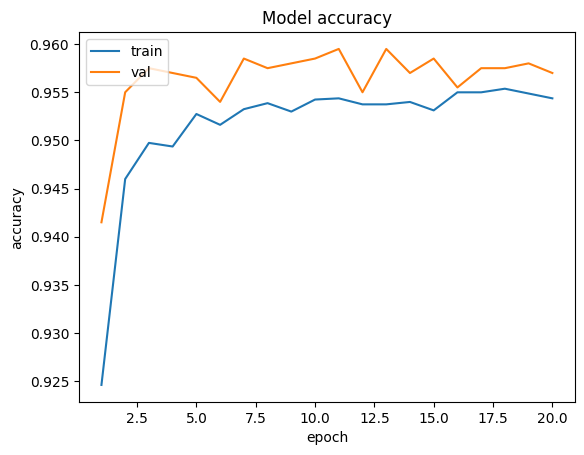

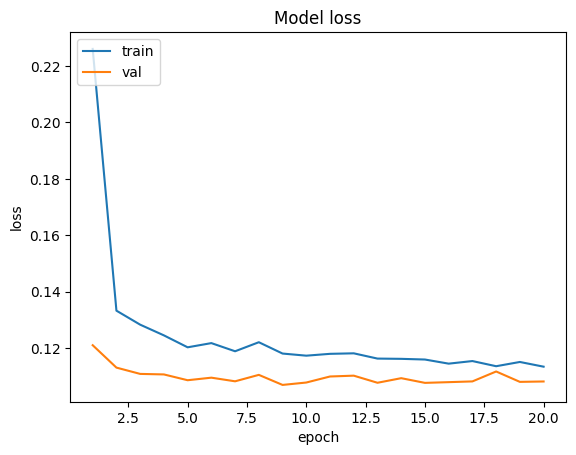

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train2.csv")
print(credit.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [ ]:
credit['NAME_TYPE_SUITE'].fillna("Unaccompanied", inplace=True)
credit['OCCUPATION_TYPE'].fillna("Other", inplace=True)
credit['AMT_GOODS_PRICE'].fillna(credit['AMT_GOODS_PRICE'].mean(), inplace=True)
credit['OWN_CAR_AGE'].fillna(credit['OWN_CAR_AGE'].mean(), inplace=True)
credit['EXT_SOURCE_1'].fillna(credit['EXT_SOURCE_1'].mean(), inplace=True)
credit['EXT_SOURCE_2'].fillna(credit['EXT_SOURCE_2'].mean(), inplace=True)
credit['EXT_SOURCE_3'].fillna(credit['EXT_SOURCE_3'].mean(), inplace=True)
credit['APARTMENTS_AVG'].fillna(credit['APARTMENTS_AVG'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_AVG'].fillna(credit['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)
credit['YEARS_BUILD_AVG'].fillna(credit['YEARS_BUILD_AVG'].mean(), inplace=True)
credit['COMMONAREA_AVG'].fillna(credit['COMMONAREA_AVG'].mean(), inplace=True)
credit['ELEVATORS_AVG'].fillna(credit['ELEVATORS_AVG'].mean(), inplace=True)
credit['BASEMENTAREA_AVG'].fillna(credit['BASEMENTAREA_AVG'].mean(), inplace=True)
credit['ENTRANCES_AVG'].fillna(credit['ENTRANCES_AVG'].mean(), inplace=True)
credit['FLOORSMAX_AVG'].fillna(credit['FLOORSMAX_AVG'].mean(), inplace=True)
credit['FLOORSMIN_AVG'].fillna(credit['FLOORSMIN_AVG'].mean(), inplace=True)
credit['LANDAREA_AVG'].fillna(credit['LANDAREA_AVG'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_AVG'].fillna(credit['LIVINGAPARTMENTS_AVG'].mean(), inplace=True)
credit['LIVINGAREA_AVG'].fillna(credit['LIVINGAREA_AVG'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_AVG'].fillna(credit['NONLIVINGAPARTMENTS_AVG'].mean(), inplace=True)
credit['NONLIVINGAREA_AVG'].fillna(credit['NONLIVINGAREA_AVG'].mean(), inplace=True)
credit['APARTMENTS_MODE'].fillna(credit['APARTMENTS_MODE'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_MODE'].fillna(credit['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)
credit['YEARS_BUILD_MODE'].fillna(credit['YEARS_BUILD_MODE'].mean(), inplace=True)
credit['COMMONAREA_MODE'].fillna(credit['COMMONAREA_MODE'].mean(), inplace=True)
credit['ELEVATORS_MODE'].fillna(credit['ELEVATORS_MODE'].mean(), inplace=True)
credit['BASEMENTAREA_MODE'].fillna(credit['BASEMENTAREA_MODE'].mean(), inplace=True)
credit['ENTRANCES_MODE'].fillna(credit['ENTRANCES_MODE'].mean(), inplace=True)
credit['FLOORSMAX_MODE'].fillna(credit['FLOORSMAX_MODE'].mean(), inplace=True)
credit['FLOORSMIN_MODE'].fillna(credit['FLOORSMIN_MODE'].mean(), inplace=True)
credit['LANDAREA_MODE'].fillna(credit['LANDAREA_MODE'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_MODE'].fillna(credit['LIVINGAPARTMENTS_MODE'].mean(), inplace=True)
credit['LIVINGAREA_MODE'].fillna(credit['LIVINGAREA_MODE'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_MODE'].fillna(credit['NONLIVINGAPARTMENTS_MODE'].mean(), inplace=True)
credit['NONLIVINGAREA_MODE'].fillna(credit['NONLIVINGAREA_MODE'].mean(), inplace=True)
credit['APARTMENTS_MEDI'].fillna(credit['APARTMENTS_MEDI'].mean(), inplace=True)
credit['YEARS_BEGINEXPLUATATION_MEDI'].fillna(credit['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)
credit['YEARS_BUILD_MEDI'].fillna(credit['YEARS_BUILD_MEDI'].mean(), inplace=True)
credit['COMMONAREA_MEDI'].fillna(credit['COMMONAREA_MEDI'].mean(), inplace=True)
credit['ELEVATORS_MEDI'].fillna(credit['ELEVATORS_MEDI'].mean(), inplace=True)
credit['BASEMENTAREA_MEDI'].fillna(credit['BASEMENTAREA_MEDI'].mean(), inplace=True)
credit['ENTRANCES_MEDI'].fillna(credit['ENTRANCES_MEDI'].mean(), inplace=True)
credit['FLOORSMAX_MEDI'].fillna(credit['FLOORSMAX_MEDI'].mean(), inplace=True)
credit['FLOORSMIN_MEDI'].fillna(credit['FLOORSMIN_MEDI'].mean(), inplace=True)
credit['LANDAREA_MEDI'].fillna(credit['LANDAREA_MEDI'].mean(), inplace=True)
credit['LIVINGAPARTMENTS_MEDI'].fillna(credit['LIVINGAPARTMENTS_MEDI'].mean(), inplace=True)
credit['LIVINGAREA_MEDI'].fillna(credit['LIVINGAREA_MEDI'].mean(), inplace=True)
credit['NONLIVINGAPARTMENTS_MEDI'].fillna(credit['NONLIVINGAPARTMENTS_MEDI'].mean(), inplace=True)
credit['NONLIVINGAREA_MEDI'].fillna(credit['NONLIVINGAREA_MEDI'].mean(), inplace=True)
credit['FONDKAPREMONT_MODE'].fillna("reg oper account", inplace=True)
credit['HOUSETYPE_MODE'].fillna("block of flats", inplace=True)
credit['TOTALAREA_MODE'].fillna(credit['TOTALAREA_MODE'].mean(), inplace=True)
credit['WALLSMATERIAL_MODE'].fillna("block", inplace=True)
credit['EMERGENCYSTATE_MODE'].fillna("No", inplace=True)
credit['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(credit['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(credit['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(credit['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(credit['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
credit['DAYS_LAST_PHONE_CHANGE'].fillna(credit['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(credit['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(credit['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(credit['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_MON'].fillna(credit['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(credit['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace=True)
credit['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(credit['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)

In [ ]:
print(credit.isnull().sum())
print(credit['TARGET'].value_counts())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

In [ ]:
non_fraud = credit[credit['TARGET'] == 0]
fraud = credit[credit['TARGET'] == 1]
print(credit['TARGET'].value_counts())

TARGET
0    1854
1     145
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)


(1854, 122) (145, 122)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100096       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0           81000.0    252000.0      14593.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied               Working

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Select only numerical columns for scaling
numerical_cols = credit.select_dtypes(include=['number']).columns
X = credit[numerical_cols].drop(['TARGET'], axis=1, errors='ignore')
y = credit['TARGET']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2966, 105) (2966,)
(742, 105) (742,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.07999998331069946
Iter 2/10, Best Cost: 0.07999998331069946
Iter 3/10, Best Cost: 0.07999998331069946
Iter 4/10, Best Cost: 0.07999998331069946
Iter 5/10, Best Cost: 0.07999998331069946
Iter 6/10, Best Cost: 0.07999998331069946
Iter 7/10, Best Cost: 0.07999998331069946
Iter 8/10, Best Cost: 0.07999998331069946
Iter 9/10, Best Cost: 0.07999998331069946
Iter 10/10, Best Cost: 0.07999998331069946
Best Position: [0.64984974 0.42417619 0.66688063 0.36793959 0.53441636 0.71923094
 0.03823865 0.06718521 0.93342693 0.9827579  0.97104058 0.03327748
 0.82068716 0.27541838 0.92948108 0.56080031 0.6944694  0.77896116
 0.3994456  0.52868257 0.22917165 0.8517416  0.0668968  0.48904648
 0.89933297 0.14763471 0.60307774 0.07074049 0.83004251 0.43192295
 0.57713445 0.62841258 0.6523068  0.40607191 0.06078807 0.32261318
 0.11782417 0.48234828 0.81678595 0.16286756 0.62490366 0.0262665
 0.68231946 0.4697228  0.3230137  0.04752271 0.51372612 0.11283154
 0.49521048 0.09389364 0.5157

Model: "sequential_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_300 (Flatten)       (None, 105)               0         
                                                                 
 dense_600 (Dense)           (None, 64)                6784      
                                                                 
 dense_601 (Dense)           (None, 32)                2080      
                                                                 
 dropout_600 (Dropout)       (None, 32)                0         
                                                                 
 dense_602 (Dense)           (None, 64)                2112      
                                                                 
 dropout_601 (Dropout)       (None, 64)                0         
                                                                 
 dense_603 (Dense)           (None, 1)              

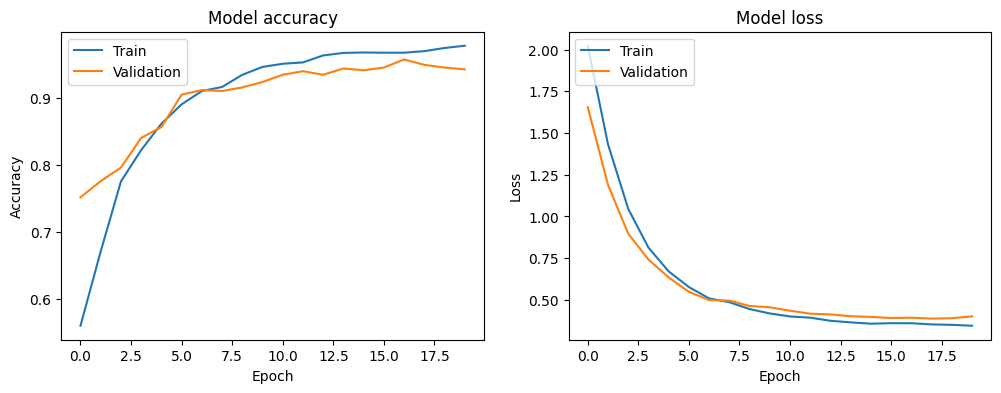

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l2
# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Fully connected layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate report

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plots as a file
plt.savefig('training_report.png')
plt.show()

# Save the model summary to a text file
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Save performance metrics to a text file
with open('performance_report.txt', 'w') as f:
    f.write(f"Test Loss: {loss}\n")
    f.write(f"Test Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"F1 Score: {f1}\n")

# Save classification report to a text file
classification_rep = classification_report(y_test, y_pred_classes)
with open('classification_report.txt', 'w') as f:
    f.write(classification_rep)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train3.csv")
print(credit.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940                1          1   
1                        1.294219                1          0   
2                        0.427715                1          0   
3                        0.362663                1          1   
4                        2.222767                1          1   

   used_pin_number  online_order  fraud  
0                0             0      0  
1                0             0      0  
2                0             1      0  
3                0             1      0  
4                0             1      0  


In [ ]:
print(credit.isnull().sum())
print(credit['fraud'].value_counts())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
fraud
0    18285
1     1715
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['fraud'] == 0]
fraud = credit[credit['fraud'] == 1]
print(credit['fraud'].value_counts())

fraud
0    18285
1     1715
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

(18285, 8) (1715, 8)
   distance_from_home  distance_from_last_transaction  \
0            2.131956                       56.372401   
1            3.803057                       67.241081   
2           15.694986                      175.989182   
3           26.711462                        1.552008   
4           10.664474                        1.565769   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        6.358667                1          0   
1                        1.872950                1          0   
2                        0.855623                1          0   
3                        4.603601                1          1   
4                        4.886521                1          0   

   used_pin_number  online_order  fraud  
0                0             1      1  
1                0             1      1  
2                0             1      1  
3                0             1      1  
4                0             1   

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['fraud'], axis=1))
y = credit['fraud']

# check the shape
print(X.shape, y.shape)

(20000, 7) (20000,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.03100001811981201
Iter 2/10, Best Cost: 0.03100001811981201
Iter 3/10, Best Cost: 0.03100001811981201
Iter 4/10, Best Cost: 0.03100001811981201
Iter 5/10, Best Cost: 0.03049999475479126
Iter 6/10, Best Cost: 0.03049999475479126
Iter 7/10, Best Cost: 0.03049999475479126
Iter 8/10, Best Cost: 0.03049999475479126
Iter 9/10, Best Cost: 0.03049999475479126
Iter 10/10, Best Cost: 0.03049999475479126
Best Position: [0.02484847 0.036577   0.92917477 0.00264143 0.25211256 0.83366118
 0.59407938]
Best Cost: 0.03049999475479126


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (16000, 3, 1)
Testing data shape: (4000, 3, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_601"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_601 (Flatten)       (None, 3)                 0         
                                                                 
 dense_1204 (Dense)          (None, 64)                256       
                                                                 
 dense_1205 (Dense)          (None, 32)                2080      
                                                                 
 dropout_1202 (Dropout)      (None, 32)                0         
                                                                 
 dense_1206 (Dense)          (None, 64)                2112      
                                                                 
 dropout_1203 (Dropout)      (None, 64)                0         
                                                                 
 dense_1207 (Dense)          (None, 1)              

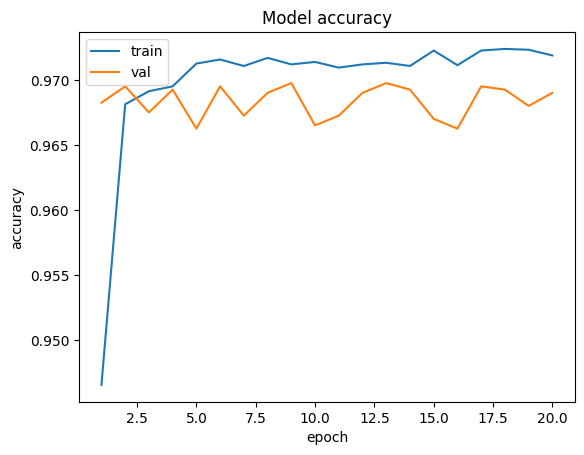

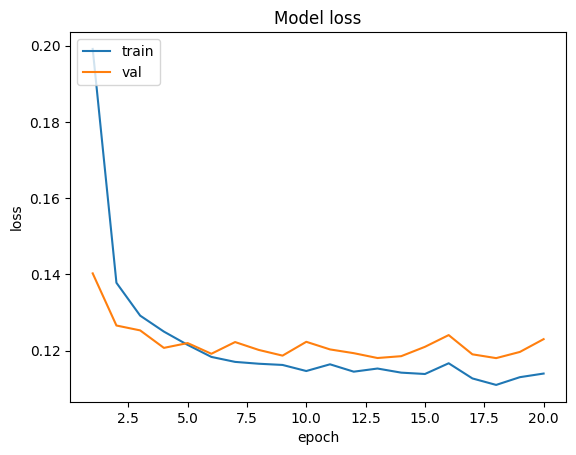

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train4.csv")
print(credit.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

In [ ]:
print(credit.isnull().sum())
print(credit['default payment next month'].value_counts())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
default payment next month
0    7740
1    2259
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['default payment next month'] == 0]
fraud = credit[credit['default payment next month'] == 1]
print(credit['default payment next month'].value_counts())

default payment next month
0    7740
1    2259
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)


(7740, 25) (2259, 25)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(15))

    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1      20000    2          2         1   24      2      2     -1     -1   
1    2     120000    2          2         2   26     -1      2      0      0   
2   14      70000    1          2         2   30      1      2      2      0   
3   17      20000    1          1         2   24      0      0      2      2   
4   22     120000    2          2         1   39     -1     -1     -1     -1   
5   23      70000    2          2         2   26      2      0      0      2   
6   24     450000    2          1         1   40     -2     -2     -2     -2   
7   27      60000    1          1         2   27      1     -2     -1     -1   
8   32      50000    1          2         2   33      2      0      0      0   
9   39      50000    1          1         2   25      1     -1     -1     -2   
10  46     210000    1          1         2   29     -2     -2     -2     -2   
11  47      20000    2          1       

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['default payment next month'], axis=1))
y = credit['default payment next month']

# check the shape
print(X.shape, y.shape)

(9999, 24) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.18000000715255737
Iter 2/10, Best Cost: 0.1784999966621399
Iter 3/10, Best Cost: 0.1784999966621399
Iter 4/10, Best Cost: 0.1784999966621399
Iter 5/10, Best Cost: 0.1784999966621399
Iter 6/10, Best Cost: 0.17799997329711914
Iter 7/10, Best Cost: 0.1769999861717224
Iter 8/10, Best Cost: 0.1769999861717224
Iter 9/10, Best Cost: 0.1769999861717224
Iter 10/10, Best Cost: 0.1769999861717224
Best Position: [0.28569603 0.62753198 0.4655397  0.12560507 0.40920355 0.59073002
 0.98690736 0.10799132 0.99038226 0.08929565 0.4686872  0.39312906
 0.52819695 0.61892959 0.7260433  0.23782994 0.01234758 0.30885233
 0.44802743 0.32685468 0.09349688 0.993598   0.41345263 0.8790678 ]
Best Cost: 0.1769999861717224


In [ ]:
# Convert best_pos to binary vector
threshold = 0.5
best_features_binary = best_pos > threshold

# Select the best features
X_selected = X[:, best_features_binary]

print(f"Selected Features Shape: {X_selected.shape}")
print(f"Selected Features Indices: {np.where(best_features_binary)[0]}")

Selected Features Shape: (9999, 9)
Selected Features Indices: [ 1  5  6  8 12 13 14 21 23]


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 9, 1)
Testing data shape: (2000, 9, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")

Model: "sequential_902"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_902 (Flatten)       (None, 9)                 0         
                                                                 
 dense_1808 (Dense)          (None, 64)                640       
                                                                 
 dense_1809 (Dense)          (None, 32)                2080      
                                                                 
 dropout_1804 (Dropout)      (None, 32)                0         
                                                                 
 dense_1810 (Dense)          (None, 64)                2112      
                                                                 
 dropout_1805 (Dropout)      (None, 64)                0         
                                                                 
 dense_1811 (Dense)          (None, 1)              

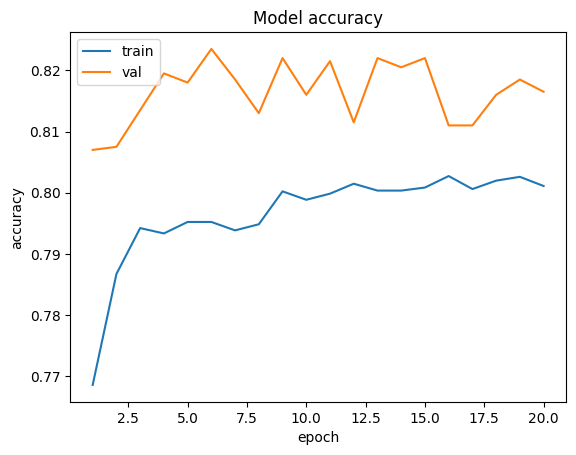

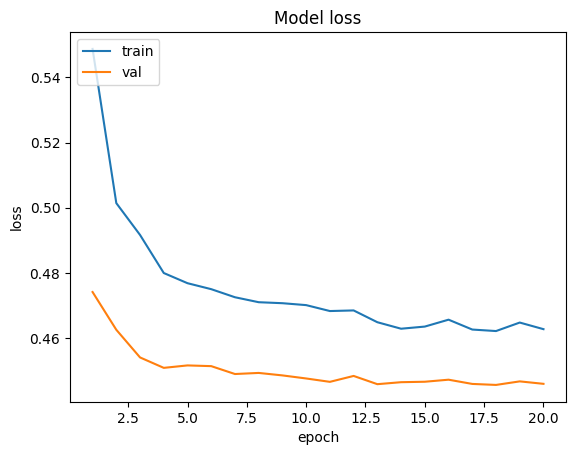

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout


In [ ]:
credit =pd.read_csv("/content/Sample_Train5.csv")
print(credit.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.130006  0.727159  0.637735 -0.987020  0.293438 -0.941386  0.549020   
1 -0.133118  0.347452  0.529808  0.140107  1.564246  0.574074  0.627719   
2 -0.095576 -0.261297  0.690708 -0.272985  0.659201  0.805173  0.616874   
3 -0.065130 -0.205698  0.575231 -0.752581  0.737483  0.592994  0.559535   
4 -0.212660  1.049921  0.968046 -1.203171  1.029577  1.439310  0.241454   

        V15       V16       V17       V18       V19       V20       V21  \

In [ ]:
print(credit.isnull().sum())
print(credit['Class'].value_counts())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    7974
1    2026
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['Class'] == 0]
fraud = credit[credit['Class'] == 1]
print(credit['Class'].value_counts())

Class
0    7974
1    2026
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(7974, 31) (2026, 31)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(15))

      id        V1        V2        V3        V4        V5        V6  \
0    541 -0.478427  0.142165 -0.046838  0.683350  0.067820 -0.404898   
1    623 -0.617111 -1.733888  1.150655  0.207829  0.903533 -0.171524   
2   4920 -0.476617  0.088942  0.326333  0.220370 -0.026730  0.432409   
3   6108 -0.832953 -0.024254 -0.260967  0.323532 -0.117119 -0.589167   
4   6329  1.020308  0.425645 -0.554113  0.868349  2.367343 -0.360087   
5   6331  0.206746  0.706513 -0.816548  1.318995  0.594065 -1.723943   
6   6334  0.215558  0.705195 -0.855171  1.246399  0.886906 -1.135409   
7   6336  0.376724  0.601380 -0.758334  1.185510  1.078065 -1.071196   
8   6338  0.369132  0.625338 -0.737571  1.178512  1.012737 -1.230750   
9   6427  0.629902  0.236773 -0.699889  0.685876 -0.280459 -0.606198   
10  6446  0.613990  0.270311 -0.687021  0.789924 -0.390662 -1.241988   
11  6472  0.850258  0.155717 -0.622400  0.636857 -0.157626 -0.607839   
12  6529 -0.317197  0.487606 -0.528588  0.228435 -0.194291 -0.70

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['Class'], axis=1))
y = credit['Class']

# check the shape
print(X.shape, y.shape)

(10000, 30) (10000,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.0
Iter 2/10, Best Cost: 0.0
Iter 3/10, Best Cost: 0.0
Iter 4/10, Best Cost: 0.0
Iter 5/10, Best Cost: 0.0
Iter 6/10, Best Cost: 0.0
Iter 7/10, Best Cost: 0.0
Iter 8/10, Best Cost: 0.0
Iter 9/10, Best Cost: 0.0
Iter 10/10, Best Cost: 0.0
Best Position: [0.68367539 0.43261589 0.27546958 0.7629495  0.61220134 0.17272469
 0.44320369 0.24415286 0.44327256 0.49115068 0.7641345  0.83925038
 0.68955424 0.78860068 0.58848319 0.16774876 0.23967732 0.06456583
 0.72533116 0.94273319 0.12069999 0.3489925  0.39194709 0.95526289
 0.21263956 0.26341001 0.86799498 0.94149827 0.75953113 0.62090747]
Best Cost: 0.0


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (8000, 15, 1)
Testing data shape: (2000, 15, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Fully connected layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_1203"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1203 (Flatten)      (None, 15)                0         
                                                                 
 dense_2412 (Dense)          (None, 64)                1024      
                                                                 
 dense_2413 (Dense)          (None, 32)                2080      
                                                                 
 dropout_2406 (Dropout)      (None, 32)                0         
                                                                 
 dense_2414 (Dense)          (None, 64)                2112      
                                                                 
 dropout_2407 (Dropout)      (None, 64)                0         
                                                                 
 dense_2415 (Dense)          (None, 1)             

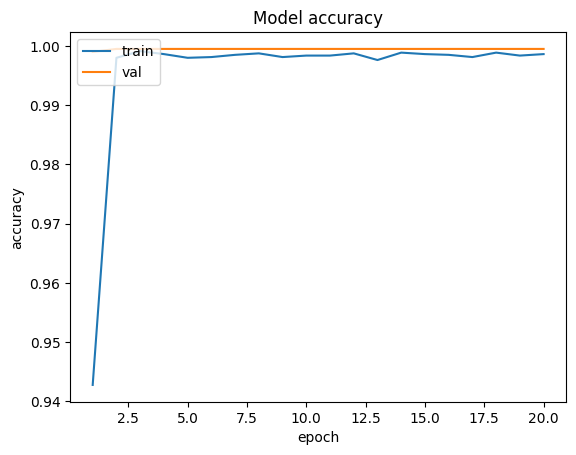

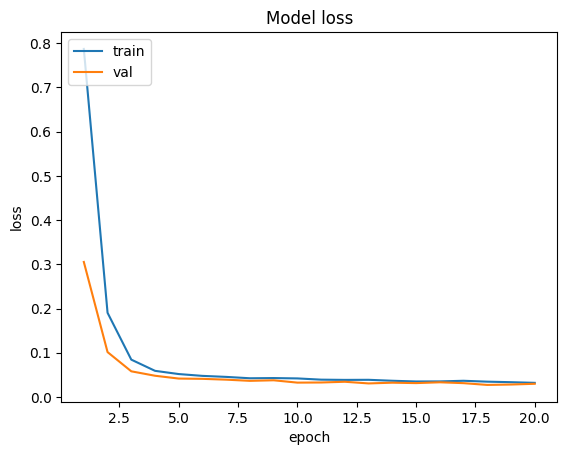

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train6.csv")
print(credit.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [ ]:
print(credit.isnull().sum())
print(credit['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    9961
1      38
Name: count, dtype: int64


In [ ]:
# Assuming 'credit' is your DataFrame containing credit card data
fraud = credit[credit['Class'] == 1]  # Filter for fraud cases
non_fraud = credit[credit['Class'] == 0]  # Filter for non-fraud cases

print(non_fraud.shape, fraud.shape)

(9961, 31) (38, 31)


In [ ]:
print(non_fraud.shape, fraud.shape)

(9961, 31) (38, 31)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head(45))

     Time        V1        V2         V3         V4        V5        V6  \
0     406 -2.312227  1.951992  -1.609851   3.997906 -0.522188 -1.426545   
1     472 -3.043541 -3.157307   1.088463   2.288644  1.359805 -1.064823   
2    4462 -2.303350  1.759247  -0.359745   2.330243 -0.821628 -0.075788   
3    6986 -4.397974  1.358367  -2.592844   2.679787 -1.128131 -1.706536   
4    7519  1.234235  3.019740  -4.304597   4.732795  3.624201 -1.357746   
5    7526  0.008430  4.137837  -6.240697   6.675732  0.768307 -3.353060   
6    7535  0.026779  4.132464  -6.560600   6.348557  1.329666 -2.513479   
7    7543  0.329594  3.712889  -5.775935   6.078266  1.667359 -2.420168   
8    7551  0.316459  3.809076  -5.615159   6.047445  1.554026 -2.651353   
9    7610  0.725646  2.300894  -5.329976   4.007683 -1.730411 -1.732193   
10   7672  0.702710  2.426433  -5.234513   4.416661 -2.170806 -2.667554   
11   7740  1.023874  2.001485  -4.769752   3.819195 -1.271754 -1.734662   
12   7891 -1.585505  3.26

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['Class'], axis=1))
y = credit['Class']

# check the shape
print(X.shape, y.shape)

(9999, 30) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.0
Iter 2/10, Best Cost: 0.0
Iter 3/10, Best Cost: 0.0
Iter 4/10, Best Cost: 0.0
Iter 5/10, Best Cost: 0.0
Iter 6/10, Best Cost: 0.0
Iter 7/10, Best Cost: 0.0
Iter 8/10, Best Cost: 0.0
Iter 9/10, Best Cost: 0.0
Iter 10/10, Best Cost: 0.0
Best Position: [0.96569711 0.45137812 0.73438899 0.59507071 0.55558205 0.4928919
 0.01644946 0.8225047  0.06086784 0.19906997 0.90756452 0.9530414
 0.6136797  0.29968784 0.34006433 0.24565404 0.20772708 0.47955247
 0.90625708 0.58246628 0.12759128 0.46195599 0.72388486 0.11122582
 0.63333829 0.75472234 0.27212434 0.20707994 0.08645445 0.31751548]
Best Cost: 0.0


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 13, 1)
Testing data shape: (2000, 13, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")

Model: "sequential_1504"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1504 (Flatten)      (None, 13)                0         
                                                                 
 dense_3016 (Dense)          (None, 64)                896       
                                                                 
 dense_3017 (Dense)          (None, 32)                2080      
                                                                 
 dropout_3008 (Dropout)      (None, 32)                0         
                                                                 
 dense_3018 (Dense)          (None, 64)                2112      
                                                                 
 dropout_3009 (Dropout)      (None, 64)                0         
                                                                 
 dense_3019 (Dense)          (None, 1)             

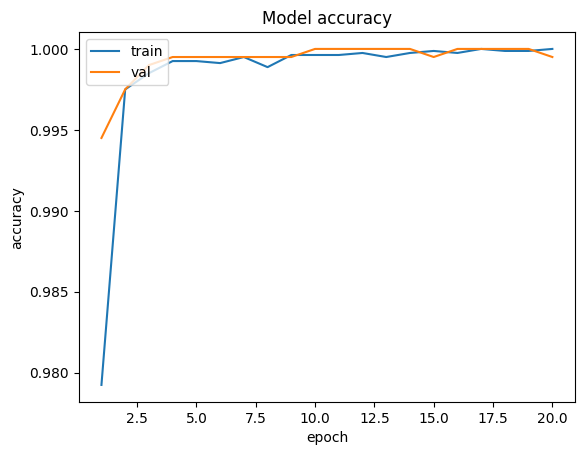

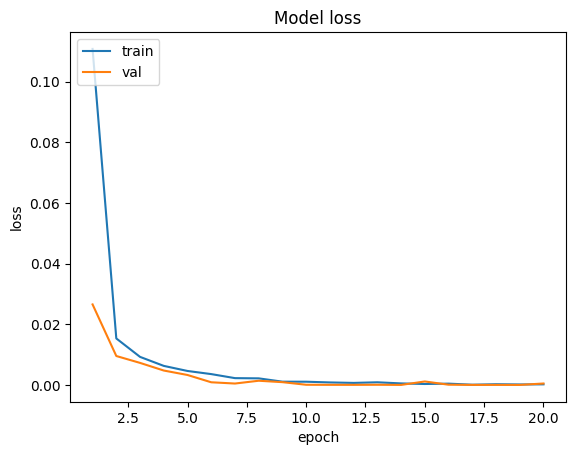

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train7.csv")

In [ ]:
print(credit.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [ ]:
print(credit.isnull().sum())
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                    2085
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_DOWN_PAYMENT               5045
AMT_GOODS_PRICE                2122
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
FLAG_LAST_APPL_PER_CONTRACT       0
NFLAG_LAST_APPL_IN_DAY            0
RATE_DOWN_PAYMENT              5045
RATE_INTEREST_PRIMARY          9962
RATE_INTEREST_PRIVILEGED       9962
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                4847
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY        

In [ ]:
credit['NFLAG_INSURED_ON_APPROVAL'].fillna(0, inplace=True)
credit['AMT_ANNUITY'].fillna(credit['AMT_ANNUITY'].mean(), inplace=True)
credit['AMT_DOWN_PAYMENT'].fillna(credit['AMT_DOWN_PAYMENT'].mean(), inplace=True)
credit['AMT_GOODS_PRICE'].fillna(credit['AMT_GOODS_PRICE'].mean(), inplace=True)
credit['RATE_DOWN_PAYMENT'].fillna(credit['RATE_DOWN_PAYMENT'].mean(), inplace=True)
credit['RATE_INTEREST_PRIMARY'].fillna(credit['RATE_INTEREST_PRIMARY'].mean(), inplace=True)
credit['RATE_INTEREST_PRIVILEGED'].fillna(credit['RATE_INTEREST_PRIVILEGED'].mean(), inplace=True)
credit['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
credit['CNT_PAYMENT'].fillna(credit['CNT_PAYMENT'].mean(), inplace=True)
credit['DAYS_FIRST_DRAWING'].fillna(credit['DAYS_FIRST_DRAWING'].mean(), inplace=True)
credit['DAYS_FIRST_DUE'].fillna(credit['DAYS_FIRST_DUE'].mean(), inplace=True)
credit['DAYS_LAST_DUE_1ST_VERSION'].fillna(credit['DAYS_LAST_DUE_1ST_VERSION'].mean(), inplace=True)
credit['DAYS_LAST_DUE'].fillna(credit['DAYS_LAST_DUE'].mean(), inplace=True)
credit['DAYS_TERMINATION'].fillna(credit['DAYS_TERMINATION'].mean(), inplace=True)
credit['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)
print(credit.isnull().sum())
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
RATE_INTEREST_PRIMARY          0
RATE_INTEREST_PRIVILEGED       0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_CO

In [ ]:
non_fraud = credit[credit['NFLAG_INSURED_ON_APPROVAL'] == 0]
fraud = credit[credit['NFLAG_INSURED_ON_APPROVAL'] == 1]
print(credit['NFLAG_INSURED_ON_APPROVAL'].value_counts())

NFLAG_INSURED_ON_APPROVAL
0.0    8011
1.0    1988
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(8011, 37) (1988, 37)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2802425      108129         Cash loans    25188.615         607500.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     2819243      176158         Cash loans    47041.335         450000.0   
3     1383531      199383         Cash loans    23703.930         315000.0   
4     1715995      447712         Cash loans    11368.620         270000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    679671.0       6374.445524         607500.0                   THURSDAY   
1    136444.5       6374.445524         112500.0                    TUESDAY   
2    470790.0       6374.445524         450000.0                     MONDAY   
3    340573.5       6374.445524         315000.0                   SATURDAY   
4    335754.0       6374.445524         270000.0                     FRIDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Handle categorical column with one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(credit[['PRODUCT_COMBINATION']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['PRODUCT_COMBINATION']))
# Concatenate encoded data with the rest of the DataFrame
# Drop the original 'PRODUCT_COMBINATION' column from 'credit'
credit_encoded = pd.concat([credit.drop('PRODUCT_COMBINATION', axis=1), encoded_df], axis=1)

# Now proceed with scaling, EXCLUDING the one-hot encoded columns
# Select only the numerical columns for scaling
numerical_columns = credit_encoded.select_dtypes(include=['number']).columns

# Create an instance of StandardScaler
scaler = StandardScaler() # Initialize the scaler

X = scaler.fit_transform(credit_encoded[numerical_columns].drop(['NFLAG_INSURED_ON_APPROVAL'], axis=1))
y = credit_encoded['NFLAG_INSURED_ON_APPROVAL']

# Check the shape
print(X.shape, y.shape)

(9999, 37) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs


In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy


In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.08600002527236938
Iter 2/10, Best Cost: 0.0820000171661377
Iter 3/10, Best Cost: 0.0820000171661377
Iter 4/10, Best Cost: 0.0820000171661377
Iter 5/10, Best Cost: 0.0820000171661377
Iter 6/10, Best Cost: 0.0820000171661377
Iter 7/10, Best Cost: 0.0820000171661377
Iter 8/10, Best Cost: 0.0820000171661377
Iter 9/10, Best Cost: 0.0820000171661377
Iter 10/10, Best Cost: 0.0820000171661377
Best Position: [0.36145079 0.04427917 0.80661831 0.88880615 0.33216416 0.18040792
 0.99998471 0.88616783 0.45669814 0.9744883  0.40022729 0.43663198
 0.68132136 0.08843549 0.5140956  0.87132062 0.60483294 0.40159167
 0.80667758 0.05035325 0.38646107 0.6882826  0.78972216 0.85178009
 0.86600985 0.19930375 0.81464807 0.63122398 0.57900395 0.45169695
 0.03637941 0.93528233 0.86633822 0.30099172 0.61033486 0.88125718
 0.2308292 ]
Best Cost: 0.0820000171661377


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7999, 21, 1)
Testing data shape: (2000, 21, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_300 (Flatten)       (None, 21)                0         
                                                                 
 dense_600 (Dense)           (None, 64)                1408      
                                                                 
 dense_601 (Dense)           (None, 32)                2080      
                                                                 
 dropout_600 (Dropout)       (None, 32)                0         
                                                                 
 dense_602 (Dense)           (None, 64)                2112      
                                                                 
 dropout_601 (Dropout)       (None, 64)                0         
                                                                 
 dense_603 (Dense)           (None, 1)              

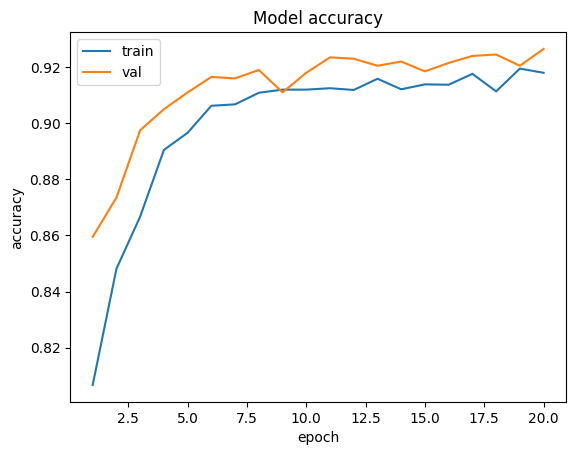

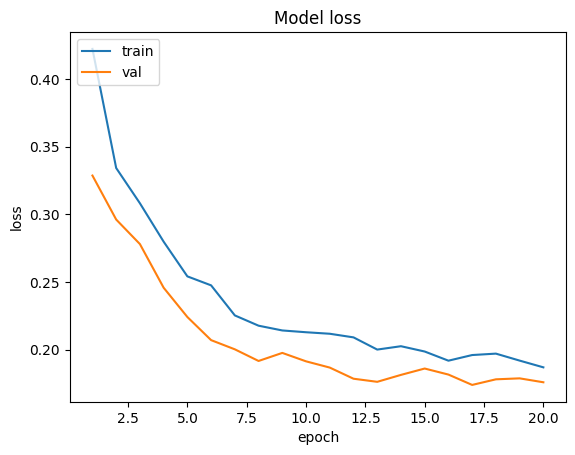

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train8.csv")
print(credit.head())

   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      9   1354      0     18      0      1      7      9      0      0  ...   
1      0    239      0      1      0      1      0      0      0      0  ...   
2      0    260      0      4      0      3      6      0      0      0  ...   
3     17    682      0      1      0      0      8     17      0      0  ...   
4      1    540      0      2      0      1      7      1      0      0  ...   

   col_103  col_104  col_105  col_106  col_107  col_108  col_109  col_110  \
0        0        0        0        1        1        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        0        1        1        0        0        0   
3        0        1        0        1        1        0        0        0   
4        0        0        0        1        1        0        0        0   

   col_111  targets  
0       49        1  
1       55  

In [ ]:
print(credit.isnull().sum())
print(credit['targets'].value_counts())

col_0      0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_108    0
col_109    0
col_110    0
col_111    0
targets    0
Length: 113, dtype: int64
targets
0    8001
1    1999
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['targets'] == 0]
fraud = credit[credit['targets'] == 1]
print(credit['targets'].value_counts())

targets
0    8001
1    1999
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(8001, 113) (1999, 113)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      9   1354      0     18      0      1      7      9      0      0  ...   
1      0    239      0      1      0      1      0      0      0      0  ...   
2      0    260      0      4      0      3      6      0      0      0  ...   
3     17    682      0      1      0      0      8     17      0      0  ...   
4      1    540      0      2      0      1      7      1      0      0  ...   

   col_103  col_104  col_105  col_106  col_107  col_108  col_109  col_110  \
0        0        0        0        1        1        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        0        1        1        0        0        0   
3        0        1        0        1        1        0        0        0   
4        0        0        0        1        1        0        0        0   

   col_111  targets  
0       49        1  
1       55  

In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()
X = scaler.fit_transform(credit.drop(['targets'], axis=1))
y = credit['targets']

# check the shape
print(X.shape, y.shape)

(10000, 112) (10000,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs

In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs

In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy

In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.08749997615814209
Iter 2/10, Best Cost: 0.08649998903274536
Iter 3/10, Best Cost: 0.08649998903274536
Iter 4/10, Best Cost: 0.08649998903274536
Iter 5/10, Best Cost: 0.08649998903274536
Iter 6/10, Best Cost: 0.08649998903274536
Iter 7/10, Best Cost: 0.08499997854232788
Iter 8/10, Best Cost: 0.08499997854232788
Iter 9/10, Best Cost: 0.08499997854232788
Iter 10/10, Best Cost: 0.08499997854232788
Best Position: [0.62812144 0.31701729 0.06254742 0.88689038 0.90751272 0.57068459
 0.51111077 0.50054738 0.77292953 0.79454311 0.67206184 0.16335857
 0.17958446 0.85979154 0.59332957 0.60799897 0.6202203  0.89312306
 0.57879641 0.09058252 0.4064156  0.23052809 0.89791303 0.30186555
 0.3049729  0.44601545 0.69937007 0.84771031 0.60384565 0.67974967
 0.0387022  0.51453299 0.07119422 0.65256414 0.94566984 0.0577707
 0.26966051 0.13724565 0.4908547  0.28484772 0.31427484 0.3686389
 0.0871621  0.35017638 0.60037475 0.52943467 0.35192554 0.77460005
 0.47288991 0.0041754  0.89004

In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (8000, 56, 1)
Testing data shape: (2000, 56, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.00000001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.00000001)))
model.add(Dropout(0.5))

# Fully connected layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.00000001)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_340"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_340 (Flatten)       (None, 56)                0         
                                                                 
 dense_696 (Dense)           (None, 64)                3648      
                                                                 
 dense_697 (Dense)           (None, 32)                2080      
                                                                 
 dropout_680 (Dropout)       (None, 32)                0         
                                                                 
 dense_698 (Dense)           (None, 64)                2112      
                                                                 
 dropout_681 (Dropout)       (None, 64)                0         
                                                                 
 dense_699 (Dense)           (None, 1)              

In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

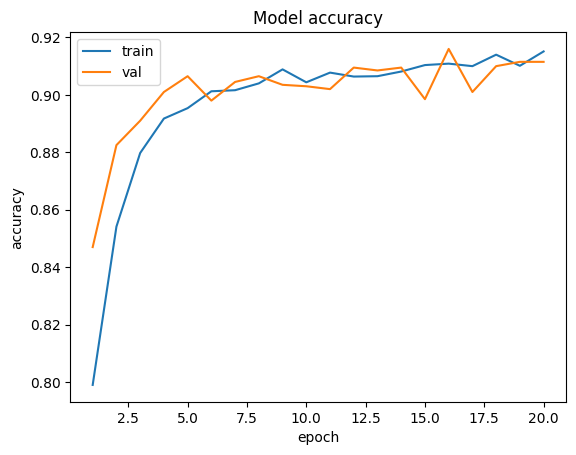

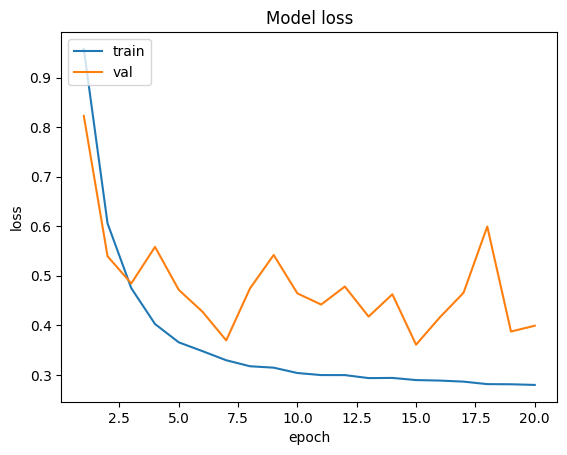

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)


In [ ]:
credit =pd.read_csv("/content/Sample_Train9.csv")
print(credit.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [ ]:
print(credit.isnull().sum())
print(credit['isFraud'].value_counts())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['isFraud'] == 0]
fraud = credit[credit['isFraud'] == 1]
print(credit['isFraud'].value_counts())

isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(9931, 10) (68, 10)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()

# Select only numerical columns
numerical_cols = credit.select_dtypes(include=['number']).columns
X = scaler.fit_transform(credit[numerical_cols]) # Scale only numerical columns
y = credit['isFraud']

# check the shape
print(X.shape, y.shape)

(9999, 7) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs

In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy

In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.0
Iter 2/10, Best Cost: 0.0
Iter 3/10, Best Cost: 0.0
Iter 4/10, Best Cost: 0.0
Iter 5/10, Best Cost: 0.0
Iter 6/10, Best Cost: 0.0
Iter 7/10, Best Cost: 0.0
Iter 8/10, Best Cost: 0.0
Iter 9/10, Best Cost: 0.0
Iter 10/10, Best Cost: 0.0
Best Position: [0.47707978 0.02832612 0.0662481  0.69360992 0.35366822 0.69278916
 0.58171313]
Best Cost: 0.0


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (7999, 3, 1)
Testing data shape: (2000, 3, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))

# Fully connected layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_612"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_612 (Flatten)       (None, 3)                 0         
                                                                 
 dense_1244 (Dense)          (None, 64)                256       
                                                                 
 dense_1245 (Dense)          (None, 32)                2080      
                                                                 
 dropout_1224 (Dropout)      (None, 32)                0         
                                                                 
 dense_1246 (Dense)          (None, 64)                2112      
                                                                 
 dropout_1225 (Dropout)      (None, 64)                0         
                                                                 
 dense_1247 (Dense)          (None, 1)              

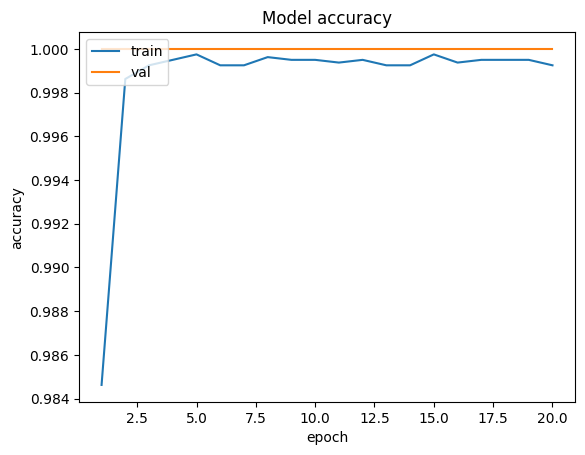

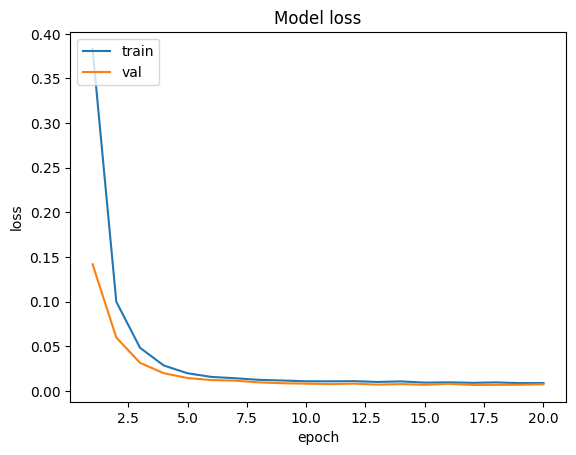

In [ ]:
# Plot the learning curve
def plot_learningcurve(history, epochs):
    epoch = range(1, epochs + 1)
    # accuracy
    plt.plot(epoch, history.history['accuracy'])
    plt.plot(epoch, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # loss
    plt.plot(epoch, history.history['loss'])
    plt.plot(epoch, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_learningcurve(history, 20)